In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder 

%matplotlib inline

In [2]:
original_dataset = pd.read_csv('../dataset/breast_cancer_data.csv', sep=',', header=0)

original_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
class          286 non-null object
age            286 non-null object
menopause      286 non-null object
tumor-size     286 non-null object
inv-nodes      286 non-null object
nodes-caps     286 non-null object
deg-malig      286 non-null int64
breast         286 non-null object
breast-quad    286 non-null object
irradiat       286 non-null object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


In [3]:
original_dataset.head()

,class,age,menopause,tumor-size,inv-nodes,nodes-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


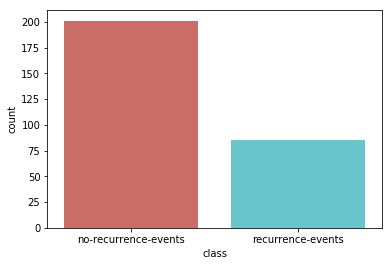

no-recurrence-events    201
recurrence-events        85
Name: class, dtype: int64 

Percentage:  [ 70.27972028  29.72027972]


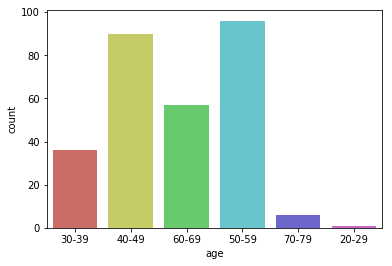

50-59    96
40-49    90
60-69    57
30-39    36
70-79     6
20-29     1
Name: age, dtype: int64 

Percentage:  [ 33.56643357  31.46853147  19.93006993  12.58741259   2.0979021
   0.34965035]


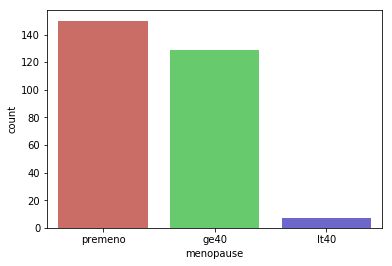

premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64 

Percentage:  [ 52.44755245  45.1048951    2.44755245]


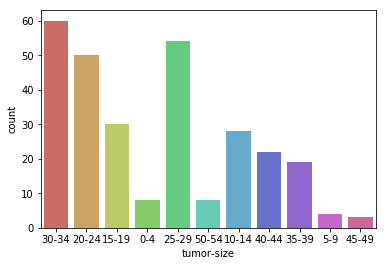

30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
50-54     8
0-4       8
5-9       4
45-49     3
Name: tumor-size, dtype: int64 

Percentage:  [ 20.97902098  18.88111888  17.48251748  10.48951049   9.79020979
   7.69230769   6.64335664   2.7972028    2.7972028    1.3986014
   1.04895105]


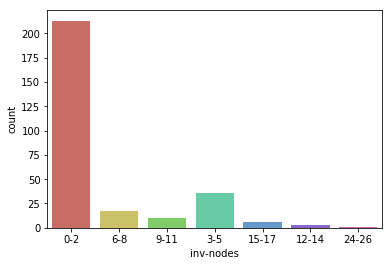

0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64 

Percentage:  [ 74.47552448  12.58741259   5.94405594   3.4965035    2.0979021
   1.04895105   0.34965035]


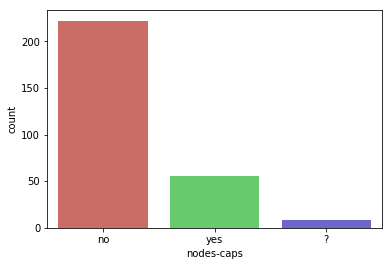

no     222
yes     56
?        8
Name: nodes-caps, dtype: int64 

Percentage:  [ 77.62237762  19.58041958   2.7972028 ]


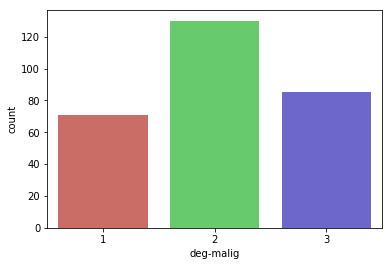

2    130
3     85
1     71
Name: deg-malig, dtype: int64 

Percentage:  [ 45.45454545  29.72027972  24.82517483]


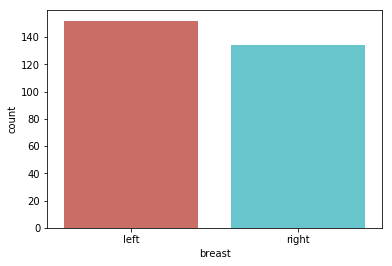

left     152
right    134
Name: breast, dtype: int64 

Percentage:  [ 53.14685315  46.85314685]


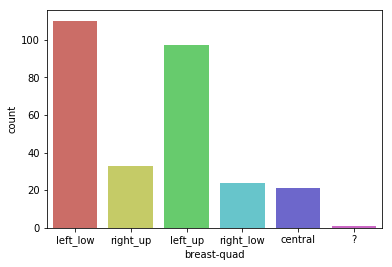

left_low     110
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast-quad, dtype: int64 

Percentage:  [ 38.46153846  33.91608392  11.53846154   8.39160839   7.34265734
   0.34965035]


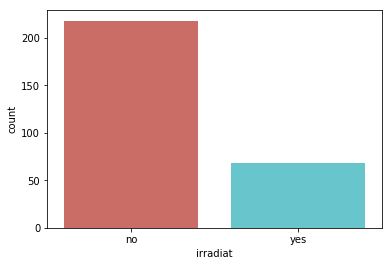

no     218
yes     68
Name: irradiat, dtype: int64 

Percentage:  [ 76.22377622  23.77622378]


In [4]:
def get_data_statistics():
    for column_head in original_dataset:
        sns.countplot(x = column_head, data=original_dataset, palette='hls')
        plt.show()
        
        statistics = original_dataset[column_head].value_counts()
        statistics_percentage = np.array(statistics)
        
        print(statistics, "\n\nPercentage: ", (statistics_percentage/286)*100)

get_data_statistics()

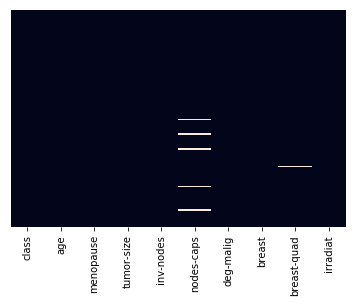

In [5]:
# Replace missing data: '?' for null value.
dataset = original_dataset.replace('?', np.nan)

sns.heatmap(dataset.isna(), cbar=False, yticklabels=False)

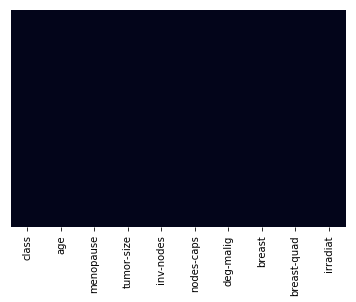

In [6]:
# Remove all nan elements
dataset = dataset.dropna()
sns.heatmap(dataset.isna(), cbar=False, yticklabels=False)

In [7]:
deleted_elements = len(original_dataset) - len(dataset)
print("\nDeleted elements: {}\nlen original dataset: {}\nlen new dataset: {}\n".format(deleted_elements,len(original_dataset), len(dataset)))


Deleted elements: 9
len original dataset: 286
len new dataset: 277



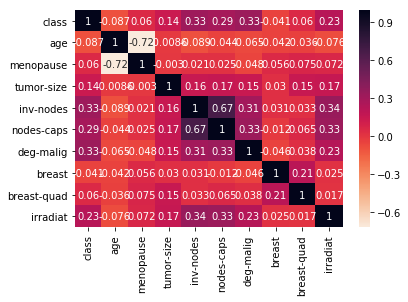

In [8]:
dataset_normalized = pd.DataFrame()
le = LabelEncoder()

for att in dataset:
    dataset_normalized[att] = le.fit_transform(dataset[att].astype(str))

sns.heatmap(dataset_normalized.corr(), annot=True, cmap=sns.cm.rocket_r)


In [9]:
dataset_normalized.head()

,class,age,menopause,tumor-size,inv-nodes,nodes-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,0,2,0,1,0
1,0,2,2,3,0,0,1,1,4,0
2,0,2,2,3,0,0,1,0,1,0
3,0,4,0,2,0,0,1,1,2,0
4,0,2,2,0,0,0,1,1,3,0


In [11]:
tumor_size = np.array(dataset_normalized['tumor-size'])
age = np.array(dataset_normalized['age'])
# Valores
X = list(zip(tumor_size, age))
# Resultados
Y = np.array(dataset_normalized['class'])

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
model = SGDClassifier(loss='log', random_state=1, max_iter=1000)
model.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [13]:
Y_predict = model.predict(X_test)
accuracy_score(Y_predict, Y_test)

0.69999999999999996

In [14]:
tumor_size = np.array(dataset_normalized['tumor-size'])
age = np.array(dataset_normalized['age'])
# Valores
X = list(zip(tumor_size, age))
# Resultados
Y = np.array(dataset_normalized['deg-malig'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
model = SGDClassifier(loss='log', random_state=1, max_iter=1000)
model.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [15]:
Y_predict = model.predict(X_test)
accuracy_score(Y_predict, Y_test)

0.35714285714285715

In [17]:
tumor_size = np.array(dataset_normalized['tumor-size'])
age = np.array(dataset_normalized['age'])
inv_nodes = np.array(dataset_normalized['inv-nodes'])
# Valores
X = list(zip(tumor_size, age, inv_nodes))
# Resultados
Y = np.array(dataset_normalized['class'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
model = SGDClassifier(loss='log', random_state=1, max_iter=1000)
model.fit(X_train, Y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1000, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=1, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [18]:
Y_predict = model.predict(X_test)
accuracy_score(Y_predict, Y_test)

0.75714285714285712